- [x] Import libraries
- [x] Jaynes-Cumming Hamiltonian
- [x] Unitary dynamics
- [x] Expectation values
- [x] Dissipative dynamics

# Import libraries

In [ ]:
import numpy as np 
import qutip as qt 
import matplotlib.pyplot as plt 

# Jaynes-Cumming Hamiltonian

$$
H = \omega_c a^\dagger a - \frac{1}{2} \omega_a \sigma_z + g(a \sigma_+ + a^\dagger \sigma_-)
$$

In [3]:
wc = 1.0;
wa = 1.0;
g = 0.1;


a = qt.tensor(qt.destroy(3), qt.qeye(2))
ad = qt.tensor(qt.create(3), qt.qeye(2))
sp = qt.tensor(qt.qeye(3), qt.create(2))
sm = qt.tensor(qt.qeye(3), qt.destroy(2))

Hc = wc*ad*a
Ha = -0.5*wa*qt.tensor(qt.qeye(3), qt.sigmaz())
Hc = g*(a*sp + ad*sm)
H_JC = Hc + Ha + Hc

In [4]:
H_JC

Quantum object: dims = [[3, 2], [3, 2]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.2         0.          0.          0.        ]
 [ 0.          0.2        -0.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.5         0.28284271  0.        ]
 [ 0.          0.          0.          0.28284271 -0.5         0.        ]
 [ 0.          0.          0.          0.          0.          0.5       ]]

# Unitary dynamics

 Unitary evolution $\rightarrow$ `mesolve` function

### Simple Example

$$
H = \sigma_x
$$

and the initial state is 
$$
|0>
$$

In [9]:
# Hamiltonian
H = qt.sigmax()
# initial state
ψ0 = qt.basis(2,0)
# times in which we store the state vector 
tlist = np.linspace(0,10,100)
# get the result 
result = qt.mesolve(H,ψ0, tlist, [], [])

In [10]:
result

Result object with sesolve data.
--------------------------------
states = True
num_collapse = 0

In [12]:
result.states[-1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.8390774+0.j        ]
 [ 0.       +0.54401206j]]

# Expectation values

In [16]:
qt.expect(qt.sigmaz(), result.states)

array([ 1.        ,  0.97966324,  0.91948013,  0.82189857,  0.69088756,
        0.53177579,  0.3510349 ,  0.15601625, -0.04534808, -0.24486795,
       -0.43442821, -0.60631884, -0.75354841, -0.87012859, -0.95131766,
       -0.99381332, -0.99588712, -0.95745468, -0.88007921, -0.76690787,
       -0.62254375, -0.45285867, -0.26475429, -0.06588149,  0.13567091,
        0.33170513,  0.51424779,  0.67587427,  0.81001063,  0.91120109,
        0.97532984,  0.99978853,  0.9835823 ,  0.92737033,  0.83343897,
        0.70560878,  0.54907906,  0.37021643,  0.17629587, -0.02479521,
       -0.22487778, -0.41581382, -0.58983733, -0.73987014, -0.85980992,
       -0.94477826, -0.9913192 , -0.99753971, -0.96318677, -0.88965766,
       -0.77994308, -0.63850553, -0.4710978 , -0.28452892, -0.08638732,
        0.11526793,  0.31223484,  0.49650212,  0.660575  ,  0.79778003,
        0.90253662,  0.97058393,  0.99915421,  0.98708537,  0.9348683 ,
        0.84462688,  0.72003156,  0.56615011,  0.38924141,  0.19

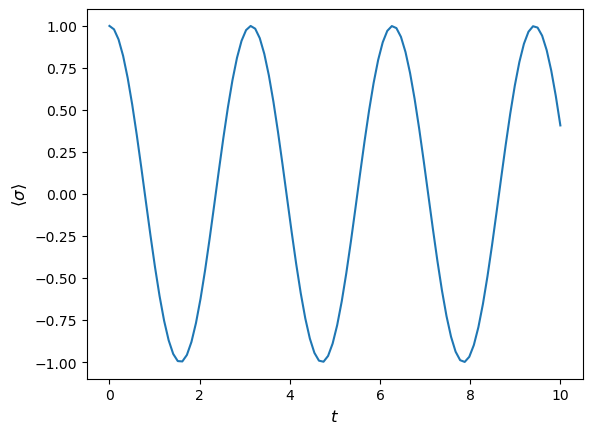

In [20]:
fig, axes = plt.subplots(1,1)
axes.plot(tlist, qt.expect(qt.sigmaz(), result.states))
axes.set_xlabel(r"$t$", fontsize=12)
axes.set_ylabel(r"$\left<\sigma\right>$", fontsize=12)
plt.show()

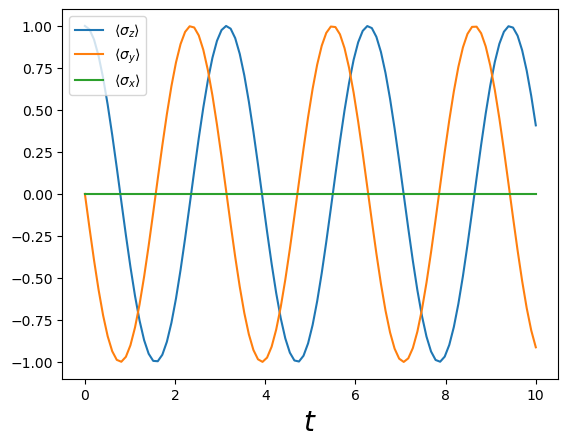

In [22]:
# get the expectation directly from mesolve
result = qt.mesolve(H, ψ0, tlist, [], [qt.sigmax(), qt.sigmay(), qt.sigmaz()])




fig, axes = plt.subplots(1, 1)

axes.plot(tlist, result.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(tlist, result.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(tlist, result.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2);




# Dissipative dynamics

In [23]:
# Collapse 
# A collapse operator is an operator that 
# describes how the system is interacting with its environment.

In [ ]:
# simple example 
# Harmonic oscillator, it loses photons with relaxation rate κ so it would be as 

$$
H = \not h \omega a^\dagger a 
$$

Collapse operator 
$$
\sqrt\kappa a
$$

In [24]:
# oscillator frequency
w = 1.0;
# relaxation rate
κ = 0.1;
# oscillator annihilation operator
a = qt.destroy(6)
# Hamiltonian
H = w*a.dag()*a    
# initial state, fock state with 5 photons
ρ0 = qt.fock_dm(6,5)
# A list of collapse operators
c_ops = [np.sqrt(κ)*a]

In [25]:
tlist = np.linspace(0,50,100)
result = qt.mesolve(H,ρ0,tlist, c_ops= c_ops, e_ops=[a.dag()*a])

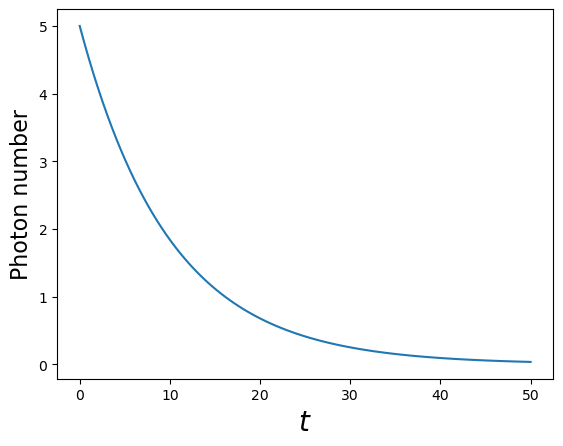

In [28]:
fig, axes = plt.subplots(1, 1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);
plt.show()